In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
import yfinance as yf
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.stats.api as sms
from datetime import datetime
from statsmodels.compat import lzip
from DATA import read_power_data
from DATA import calculate_capture_factors
from DATA import calculate_volatility
from DATA import filter_dates_by_interval
from DATA import fixed_effect_model
from DATA import analyze_power_data

In [2]:
### First PLot 

Power_DATA = read_power_data()
energy_sources = ['Wind offshore', 'Wind onshore', 'Solar']
frequency = 'monthly' # or 'monthly', 'yearly'
percentage_change_df = calculate_capture_factors(Power_DATA, energy_sources,frequency)
weighted_volatility_reset = calculate_volatility(Power_DATA,frequency=frequency)
ANALYSE_DATA = pd.merge(percentage_change_df, weighted_volatility_reset, on='Date', how='inner')
# Filter Data
column_names = ['Capture_Factor_Wind offshore', 'Capture_Factor_Wind onshore', 'Capture_Factor_Solar']
interval_start = -1.0
interval_end = 1.0
date = pd.Timestamp(2024, 1, 1)
ANALYSE_DATA_F = filter_dates_by_interval(ANALYSE_DATA, column_names, interval_start, interval_end, date,print_deleted_dates=False)



### Second Plot 

# POWER DATA
Power_DATA = read_power_data()
energy_sources = ['Wind offshore', 'Wind onshore', 'Solar']
frequency = 'monthly'
weighted_volatility_reset = calculate_volatility(Power_DATA,frequency=frequency)
# STOCK DATA
ticker = ["^GDAXI","X03G.DE"]
data = yf.download(ticker, start="2015-01-01", end="2023-12-31")
start_of_month_data = data['Adj Close'].resample('MS').first()
monthly_returns = start_of_month_data.pct_change().dropna()
Volcomp = pd.merge(monthly_returns, weighted_volatility_reset, on='Date', how='inner')

C:\Users\Bruger\anaconda3\ASEM\Energy-Economics\DATA.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  capture_factors['Date'] = pd.to_datetime(capture_factors[['Year', 'Month']].assign(day=1))


[*********************100%%**********************]  2 of 2 completed


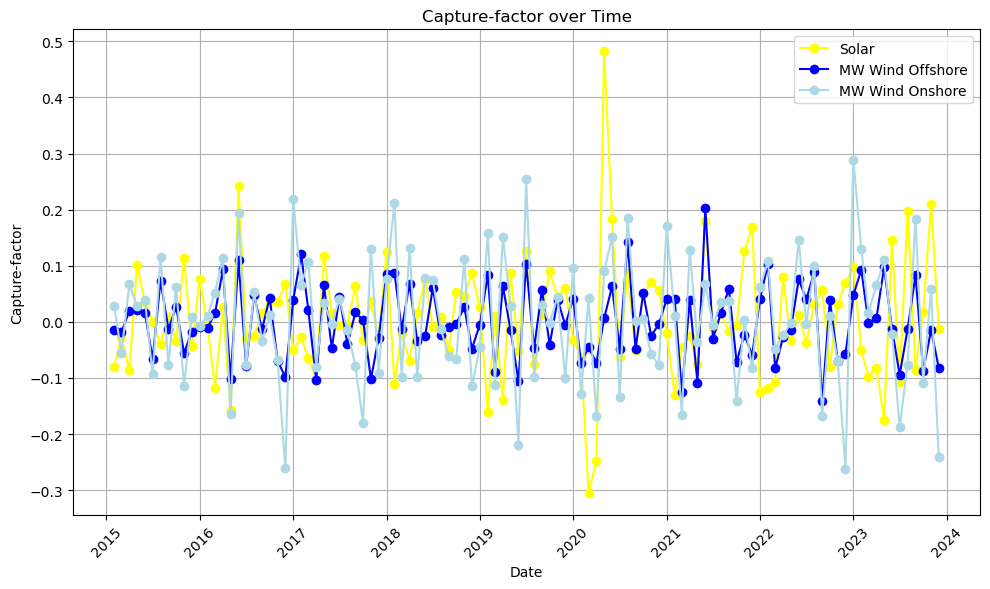

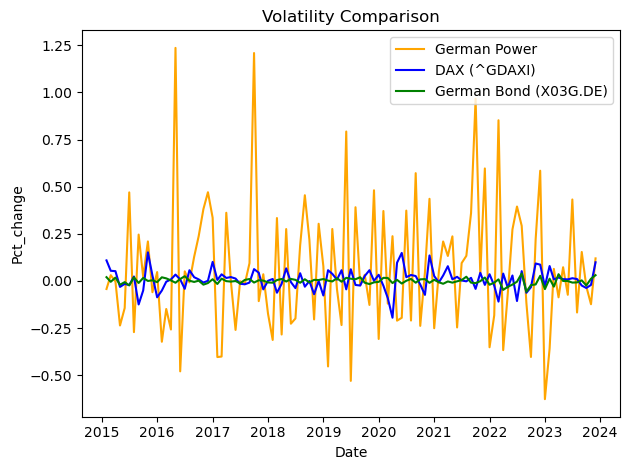

In [3]:
plt.figure(figsize=(10, 6))
plt.plot(ANALYSE_DATA_F['Date'], ANALYSE_DATA_F['Capture_Factor_Solar'], marker='o', color='yellow', linestyle='-', label='Solar')
plt.plot(ANALYSE_DATA_F['Date'], ANALYSE_DATA_F['Capture_Factor_Wind offshore'], marker='o', color='blue', linestyle='-', label='MW Wind Offshore')
plt.plot(ANALYSE_DATA_F['Date'], ANALYSE_DATA_F['Capture_Factor_Wind onshore'] , marker='o', color='lightblue', linestyle='-', label='MW Wind Onshore')
plt.title('Capture-factor over Time')
plt.xlabel('Date')
plt.ylabel('Capture-factor')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()
plt.plot(Volcomp['Date'], Volcomp['Weighted_volatility_adj'], label='German Power', color='orange')
plt.plot(Volcomp['Date'], Volcomp['^GDAXI'], label='DAX (^GDAXI)', color='blue')
plt.plot(Volcomp['Date'], Volcomp['X03G.DE'], label='German Bond (X03G.DE)', color='green')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Pct_change')
plt.title('Volatility Comparison')
plt.legend()
# Show plot
plt.tight_layout()
plt.show()